# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Nur Atikah Budiutami
- **Email:** nuratikahbudiutami@gmail.com
- **ID Dicoding:** nuratikah354

1. Kategori produk mana yang tingkat penjualannya tertinggi dan terendah selama 2016-2018?
2. Negara bagian atau kota mana di Brasil dengan volume pesanan tertinggi?
3. Berapa waktu rata-rata yang diperlukan antara waktu pemesanan dan penerimaan barang?
4. Berapa rentang transaksi yang dibayarkan pelanggan dan berapa rata-ratanya?

## Import Semua Packages/Library yang Digunakan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install streamlit babel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

Dari 2 pertanyaan bisnis di atas akan dijawab melalui proses analisis data, dataset yang digunakan adalah :
- customers_dataset.csv
- order_items_dataset.csv
- orders_dataset.csv
- product_category_name_translation.csv
- products_dataset.csv


In [3]:
customers_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/customers_dataset.csv')
display(customers_df.head())

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
order_items_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/order_items_dataset.csv')
display(order_items_df.head())

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
orders_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/orders_dataset.csv')
display(orders_df.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
product_category_name_translation_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/product_category_name_translation.csv')
display(product_category_name_translation_df.head())

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [7]:
products_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/products_dataset.csv')
display(products_df.head())

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- customers_df adalah datframe berisi informasi tentang jumlah pelanggan berdasarkan nama kota dan nama negara bagian.
- order_items_df adalah dataframe yang berisi informasi tentang item setiap pembelian.
- orders_df adalah dataframe yang berisi informasi tentang tanggal pemesanan, tanggal pengiriman, tanggal estimasi sampai, dan tanggal pesanan sampai pada pelanggan.
- product_category_name_translation_df adalah dataframe yang berisi nama produk dalam bahasa inggris yang terjual.
- product_df adalah daatframe yang berisi informasi tentang jumlah kategori produk yang terjual.

### Assessing Data

#### Menilai tabel `customers_df`

In [8]:
customers_df.info()
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi:  0


In [9]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


 Dari seluruh kolom di atas diketahui bahwa tidak ada masalah dari jumlah data maupun tipe data, serta tidak terdapat duplikasi dan keanehan dari tabel customers_df.

#### Menilai tabel `order_items_df`

In [10]:
order_items_df.info()
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah duplikasi:  0


In [11]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Tabel order_items_df tidak ada nilai yang hilang atau duplikasi, tetapi ada keanehan pada kolom shipping_limit_date bertipe object yang mana seharusnya tipe datanya adalah datetime. Maka tabel akan diperbaiki pada proses cleaning data.

#### Menilai tabel `orders_df`

In [12]:
orders_df.info()
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah duplikasi:  0


In [13]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date memiliki nilai yang hilang. Semua kolom tanggal (order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date) bertipe object dan sebaiknya dikonversi ke tipe data datetime.
Maka tabel orders_df akan diperbaiki pada proses cleaning data.

#### Menilai tabel `product_category_name_translation_df`

In [14]:
product_category_name_translation_df.info()
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Jumlah duplikasi:  0


In [15]:
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Dari seluruh kolom di atas diketahui bahwa tidak ada masalah dari jumlah data maupun tipe data, serta tidak terdapat duplikasi dan keanehan dari tabel product_category_name_translation_df

#### Menilai tabel `products_df`

In [16]:
products_df.info()
print("Jumlah duplikasi: ", products_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


In [17]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Beberapa kolom seperti product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, dan product_width_cm memiliki nilai yang hilang. Maka tabel products_df akan diperbaiki pada proses cleaning data.

**Insight:**
Dari proses Assessing Data di atas diperoleh  bahwa ada beberapa dataframe yang harus dibersihkan dan diperbaiki, yaitu :
- Customers_df : Tidak ada
- Order_items_df : Memperbaiki tipe data
- Orders_df : Missing value dan memperbaiki tipe data
- Product_category_name_translation_df : Tidak ada
- Products_df : Missing value

### Cleaning Data

#### Membersihkan tabel `order_items_df`

##### Memperbaiki tipe data

Tipe data pada kolom shipping_limit_date  akan diubah ke tipe datatime.

In [18]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Membersihkan tabel `orders_df`

##### Memperbaiki tipe data

Semua kolom tanggal (order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date) bertipe object dan akan dikonversi ke tipe data datetime.

In [19]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


##### Missing values

Menghitung jumlah missing value pada masing-masing kolom dengan cara berikut :

In [20]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [21]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [22]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [23]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


Missing value terjadi pada kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date. Setelah diperiksa ditemukan bahwa data yang terdapat missing value adalah data dengan order_status bukan delivered/belum selesai, yang mana data tersebut tidak dapat digunakan untuk menjawab pertanyaan yang akan dijawab. Oleh karena itu, cara mengatasinya adalah dengan menghapus baris yang terdapat missing value (metode dropping) sebagai berikut :

In [24]:
orders_df.dropna(axis=0, inplace=True)

Mengecek kembali apakah masih ada missing value

In [25]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


Terlihat sudah tidak ada keanehan pada tabel orders_df

#### Membersihkan tabel `products_df`

##### Missing values

Melihat missing value pada masing-masing kolom

In [26]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [27]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [28]:
products_df[products_df.product_name_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [29]:
products_df[products_df.product_description_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [30]:
products_df[products_df.product_photos_qty.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [31]:
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Teknik mengatasi missing value pada product_df adalah dengan menghapus baris yang terdapat missing value (metode dropping), sebagai berikut:

In [32]:
products_df.dropna(axis=0, inplace=True)

Mengecek kembali apakah masih ada mising value

In [33]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


Terlihat sudah tidak ada keanehan pada tabel products_df

**Insight:**

Berdasarkan proses cleaning data yang telah dilakukan diperoleh bahwa
- order_items_df: Kolom shipping_limit_date yang awalnya bertipe object telah berhasil dikonversi ke tipe data datetime.

- orders_df: Semua kolom yang berkaitan dengan tanggal (order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date) yang semula bertipe object telah dikonversi ke tipe data datetime. Selain itu, missing values pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date telah ditangani dengan menghapus baris yang mengandung nilai-nilai tersebut, karena sebagian besar berkaitan dengan pesanan yang belum selesai atau dibatalkan.

- products_df: Missing values pada beberapa kolom seperti product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, dan product_width_cm juga telah ditangani dengan menghapus baris yang mengandung nilai-nilai yang hilang tersebut.

Secara keseluruhan, proses cleaning data telah berhasil membersihkan dan menyiapkan ketiga DataFrame (order_items_df, orders_df, dan products_df) dari tipe data yang tidak sesuai dan missing values, sehingga data siap untuk analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [34]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [35]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Melihat demografi penjualan berdasarkan nama kota (customer_city), sebagai berikut:

In [36]:
customers_df.customer_city.value_counts()

,count
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
olhos d'agua,1
pacotuba,1
sao sebastiao do paraiba,1


Kota penjualan yang paling sering muncul adalah 'sao paulo' dengan 15.540 kemunculan dari 4.119 kota unik yang artinya banyak pelanggan terbanyak ada di kota Sao paulo.

Melihat demografi penjualan berdasarkan nama negara bagian (customer_state), sebagai berikut :

In [37]:
customers_df.customer_state.value_counts()

,count
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


Negara bagian "SP" (São Paulo) menyumbang penjualan terbesar, dengan 41.746 kejadian di 27 negara bagian yang berbeda yang artinya banyak pelanggan terbanyak ada di Negara bagian SP (Sao paulo).

### Explore order_items_df

In [38]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [39]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [40]:
order_items_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


Menghitung jumlah produk unik yang ada di dalam DataFrame order_items_df

In [41]:
order_items_df.product_id.nunique()

32951

In [42]:
order_items_df.order_item_id.value_counts()

,count
order_item_id,
1,98666
2,9803
3,2287
4,965
5,460
6,256
7,58
8,36
9,28


Dataset ini berisi 112.650 item pesanan tanpa nilai yang hilang.
98.666 pesanan hanya berisi satu item dan 1 pesanan berisi 21 item, rata-rata jumlah item yaitu seperti yang ditunjukkan oleh mean order_item_id sekitar 1,2 item.
Harga produk berkisar dari 0,85 dollar hingga 6.735,00 dollar, dengan rata-rata sekitar 120,65 dollar.
Terdapat 32.951 produk unik.

### Explore orders_df

In [43]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


Menambahkan kolom baru untuk menghitung waktu yang diperlukan antara pemesanan barang dan barang diterima yaitu dengan menghitung selisih kolom order_purchase_timestamp dan order_delivered_customer_date. Kemudian dibuatkan kolom baru bernama delivery_time yang menyimpan selisih waktu dalam hari.

In [44]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
orders_df["delivery_time"] = (delivery_time.dt.total_seconds() / (24 * 3600)).round()
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


In [45]:
orders_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,96461,96461,96461,96461,96461,96461.000000
mean,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,12.517007
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000
25%,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,7.000000
50%,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,10.000000
75%,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,16.000000
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,210.000000
std,NaN,NaN,NaN,NaN,NaN,9.550354


Dari kolom di atas diperoleh pesanan sampai pada pelanggan membutuhkan waktu paling cepat satu hari dan paling lama 210 hari. Sedangkan rata-rata waktu yang diperlukan ditunjukkan oleh baris mean pada kolom delivery_time yaitu  sekitar 12.5 hari

### Explore product_category_name_translation_df

Tampilkan lima baris pertama dan info dari DataFrame `product_category_name_translation_df`



In [46]:
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor



Menampilkan ringkasan informasi dari `product_category_name_translation_df` menggunakan `info()`



In [47]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [48]:
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [49]:
product_category_name_translation_df.product_category_name.value_counts()

,count
product_category_name,
beleza_saude,1
informatica_acessorios,1
automotivo,1
cama_mesa_banho,1
moveis_decoracao,1
...,...
flores,1
artes_e_artesanato,1
fraldas_higiene,1


Terdapat 71 kategori produk unik, yang semuanya memiliki terjemahan bahasa Inggris yang tersedia.

### Explore products_df

In [50]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [51]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [52]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Menampilkan distribusi nilai unik untuk kolom `product_category_name` di `products_df` menggunakan metode `.value_counts()`

In [53]:
products_df.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


cama_mesa_banho adalah kategori produk yang paling sering muncul di products_df dengan 3.029 entri, dan yang paling sedikit adalah cds_dvds_musicais dengan hanya 1 entri.

### Menggabungkan product_category_name_translation_df dan products_df

In [54]:
products_translated_df = pd.merge(
    products_df,
    product_category_name_translation_df,
    on='product_category_name',
    how='left'
)

print('Informasi DataFrame gabungan (products_translated_df):')
products_translated_df.info()
print('\nBeberapa Baris Pertama dari DataFrame Gabungan (products_translated_df):')
display(products_translated_df.head())

Informasi DataFrame gabungan (products_translated_df):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32340 entries, 0 to 32339
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32340 non-null  object 
 1   product_category_name          32340 non-null  object 
 2   product_name_lenght            32340 non-null  float64
 3   product_description_lenght     32340 non-null  float64
 4   product_photos_qty             32340 non-null  float64
 5   product_weight_g               32340 non-null  float64
 6   product_length_cm              32340 non-null  float64
 7   product_height_cm              32340 non-null  float64
 8   product_width_cm               32340 non-null  float64
 9   product_category_name_english  32327 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB

Beberapa Baris Pertama dari DataFrame Gabungan (products_transl

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [55]:
products_translated_df.product_category_name_english.value_counts()

,count
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
tablets_printing_image,9
fashion_childrens_clothes,5
home_comfort_2,5


cama_mesa_banho (bed_bath_table) adalah kategori produk yang paling sering muncul di products_df dengan 3.029 entri, dan yang paling sedikit adalah cds_dvds_musicals dengan hanya 1 entri.

**Insight:**
- Kota penjualan yang paling sering muncul adalah 'sao paulo' dengan 15.540 kemunculan dari 4.119 kota unik.
- Negara bagian "SP" (São Paulo) menyumbang penjualan terbesar, dengan 41.746 kejadian diantara 27 negara bagian yang berbeda.
- Dari data set yang ada 98.666 pesanan hanya berisi satu item dan 1 pesanan berisi 21 item, rata-rata jumlah item dalam satu pesanan yaitu seperti yang ditunjukkan oleh mean order_item_id sekitar 1,2 item. Harga produk berkisar dari 0,85 dollar hingga 6.735,00 dollar, dengan rata-rata sekitar 120,65 dollar. Terdapat 32.951 produk unik.
- Pesanan sampai pada pelanggan membutuhkan waktu paling cepat satu hari dan paling lama 210 hari.Sedangkan rata-rata waktu yang diperlukan ditunjukkan oleh baris mean pada kolom delivery_time yaitu  sekitar 12.5 hari
- Cama_mesa_banho (bed_bath_table) adalah kategori produk yang paling sering muncul di products_df dengan 3.029 entri, dan yang paling sedikit adalah cds_dvds_musicals dengan hanya 1 entri. Tetapi dari jumlah ini belum diketahui jumlah item perkategorinya.

## Visualization & Explanatory Analysis

Proses ini akan membuat visualisasi data dan explanatory analysis guna menjawab pertanyaat-pertanyaan bisnis di atas

### Pertanyaan 1: Kategori produk mana yang tingkat penjualannya tertinggi dan terendah selama 2016-2018?

untuk menemukan jawaban dari pertanyaan tersebut langkah-langkah yang harus dilalui yaitu menggabungkan dataframe yang saling berkaitan antara lain `order_items_df`,`orders_df`,`order_items_df`,`products_df`, dan `product_category_name_translation_df`. Kemudian dihitung jumlah penjualan (order_item_id) untuk masing-masing kategori produk (product_category_name_english). Agar hasil analisanya lebih mudah difahami maka divisualisasikan dengan diagram histogram.

 - Gabungkan `order_items_df` dengan `orders_df` menggunakan kolom `order_id`.


In [56]:
merged_df = pd.merge(order_items_df, orders_df, on='order_id', how='left')
display(merged_df.head())

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,8.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0


- Selanjutnya gabungkan `merged_df` dengan `products_df` menggunakan kolom `product_id`



In [57]:
merged_df = pd.merge(merged_df, products_df, on='product_id', how='left')
display(merged_df.head())

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_estimated_delivery_date,delivery_time,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-29,8.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-15,16.0,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-02-05,8.0,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-20,6.0,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-17,25.0,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


- Selanjutnya menggabungkan `merged_df` (yang mengandung order items dan order details) dengan `product_category_name_translation_df` untuk menambahkan poduct categori dalam bahasa inggris. dengan menggunakan kolom `product_category_name`.



In [58]:
merged_df = pd.merge(merged_df, product_category_name_translation_df, on='product_category_name', how='left')
merged_df.info()
display(merged_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   customer_id                    110180 non-null  object        
 8   order_status                   110180 non-null  object        
 9   order_purchase_timestamp       110180 non-null  datetime64[ns]
 10  order_approved_at              110180 non-null  datetime64[ns]
 11  

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,delivery_time,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,8.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,16.0,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,8.0,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,6.0,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,25.0,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [59]:
merged_df.product_id.nunique()

32951

In [60]:
product_sales_by_category = merged_df.groupby('product_category_name_english')['order_item_id'].sum().sort_values(ascending=False)
print('10 Penjualan Tertinggi berdasarkan Kategori Produk:')
display(product_sales_by_category.head(10))
print('10 Penjualan Terendah berdasarkan Kategori Produk:')
display(product_sales_by_category.tail(10))

10 Penjualan Tertinggi berdasarkan Kategori Produk:


,order_item_id
product_category_name_english,
bed_bath_table,13665
furniture_decor,11540
health_beauty,11081
sports_leisure,9932
computers_accessories,9874
housewares,9051
watches_gifts,6594
garden_tools,5874
telephony,5161


10 Penjualan Terendah berdasarkan Kategori Produk:


,order_item_id
product_category_name_english,
music,39
home_comfort_2,39
fashion_sport,38
furniture_mattress_and_upholstery,38
flowers,37
arts_and_craftmanship,26
la_cuisine,16
cds_dvds_musicals,16
fashion_childrens_clothes,8


- Untuk membuat visualisasi dari 10 kategori yang paling banyak terjual dan 10 kategori yang paling sedikit terjual menggunakan `matplotlib` dan `seaborn`.



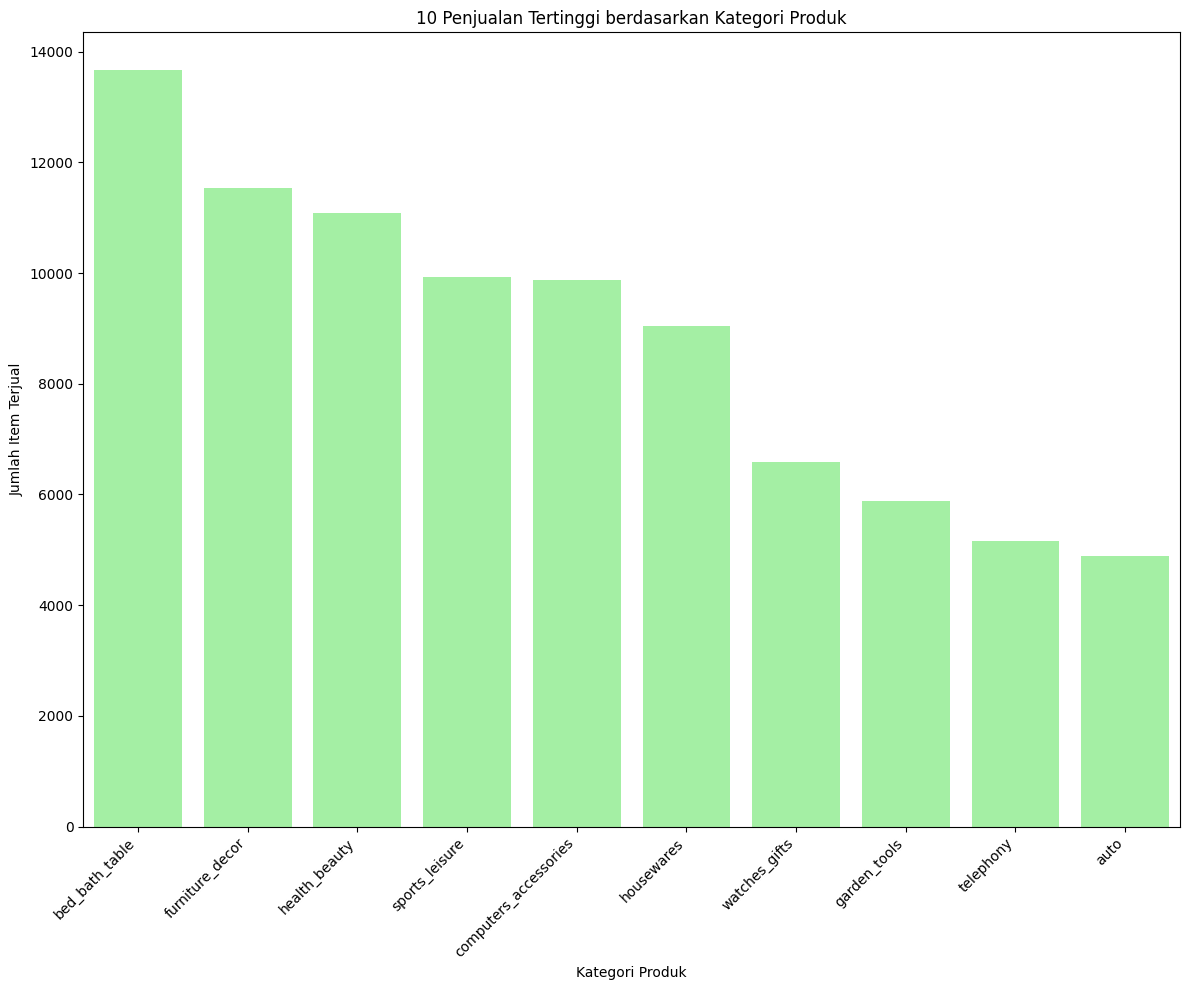

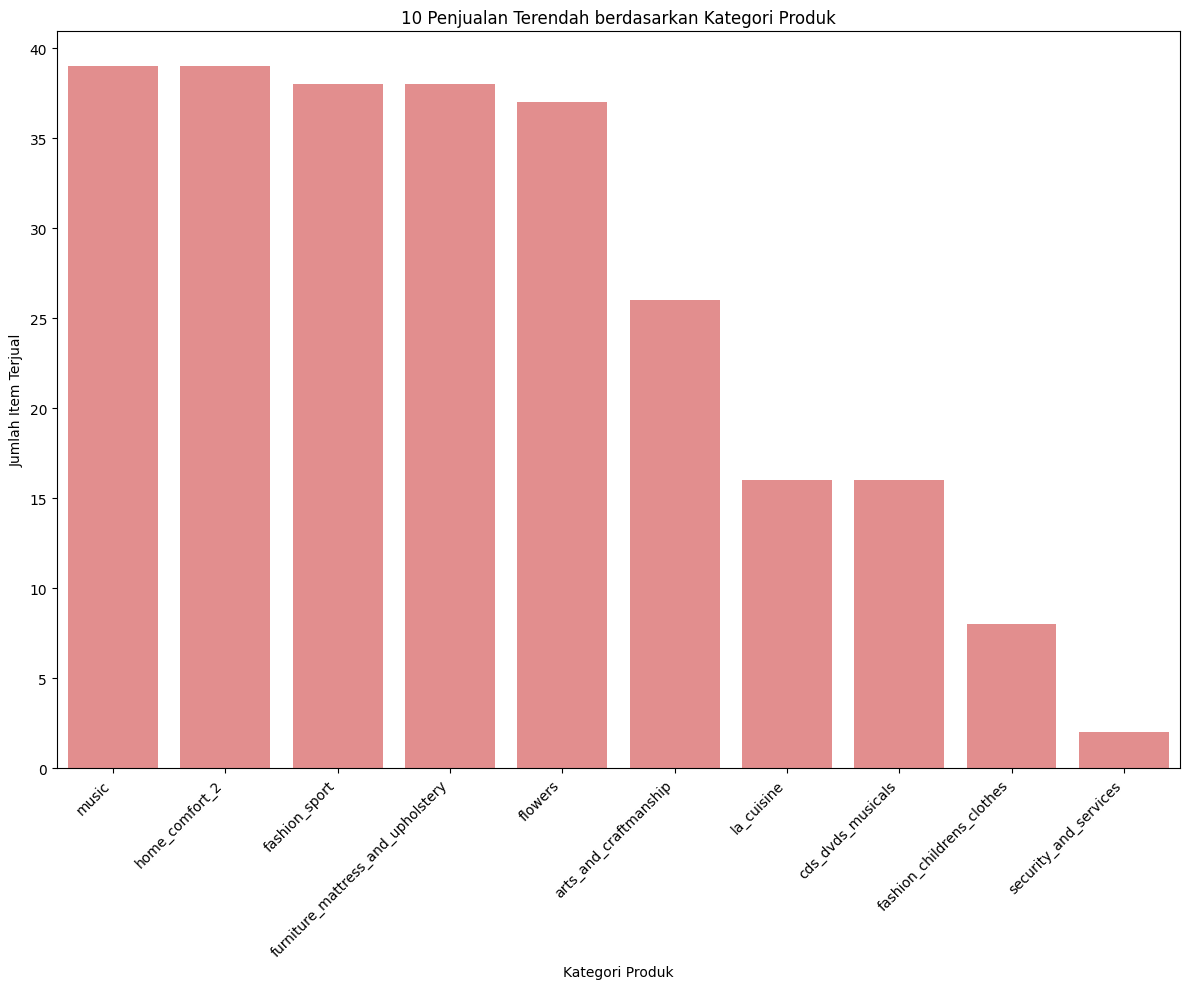

In [61]:
plt.figure(figsize=(12, 10))
sns.barplot(x=product_sales_by_category.head(10).index, y=product_sales_by_category.head(10).values, color='palegreen', legend=False)
plt.title('10 Penjualan Tertinggi berdasarkan Kategori Produk', fontsize=12)
plt.xlabel('Kategori Produk', fontsize=10)
plt.ylabel('Jumlah Item Terjual', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print(' '*50)
print(' '*50)
print(' '*50)
plt.figure(figsize=(12, 10))
sns.barplot(x=product_sales_by_category.tail(10).index, y=product_sales_by_category.tail(10).values, color='lightcoral', legend=False)
plt.title('10 Penjualan Terendah berdasarkan Kategori Produk', fontsize=12)
plt.xlabel('Kategori Produk', fontsize=10)
plt.ylabel('Jumlah Item Terjual', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight**

Kategori produk yang penjualannya tertinggi berdasarkan jumlah barang terjual adalah 'bed_bath_table' (13.665 item). Sebaliknya, kategori yang penjualannya tererndah yaitu 'security_and_services' (2 item).

### Pertanyaan 2: Negara bagian atau kota mana di Brasil dengan volume pesanan tertinggi?

untuk menemukan jawaban dari pertanyaan tersebut langkah-langkah yang harus dilalui yaitu menggabungkan dataframe yang saling berkaitan antara lain `orders_df`,`customers_df`, dan `order_items_df`. Kemudian dihitung volume pesanan tertinggi pada kota tertentu (customer_city) dan volume pesanan tertinggi pada negara bagian tertentu (customers_state). Agar hasil analisanya lebih mudah difahami maka divisualisasikan dengan diagram histogram.

- Menggabungkan `orders_df` dengan `customers_df` menggunakan kolom `customer_id` untuk menggabungkan informasi demografi pelanggan dengan nama `temp_df`


In [62]:
temp_df = pd.merge(orders_df, customers_df, on='customer_id', how='left')
display(temp_df.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


- Selanjutnya menggabungkan `temp_df` dengan `order_items_df` menggunakan kolom `order_id` untuk menghasilkan tabel baru `geo_data_df`.



In [63]:
geo_data_df = pd.merge(temp_df, order_items_df, on='order_id', how='left')
geo_data_df = geo_data_df[['customer_city', 'customer_state', 'order_id', 'price', 'freight_value']]
display(geo_data_df.head())
print(f"Jumlah baris geo_data_df setelah merge: {len(geo_data_df)}")
geo_data_df.info()

,customer_city,customer_state,order_id,price,freight_value
0,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,29.99,8.72
1,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,118.70,22.76
2,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,159.90,19.22
3,sao goncalo do amarante,RN,949d5b44dbf5de918fe9c16f97b45f8a,45.00,27.20
4,santo andre,SP,ad21c59c0840e6cb83a9ceb5573f8159,19.90,8.72


Jumlah baris geo_data_df setelah merge: 110180
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110180 entries, 0 to 110179
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   customer_city   110180 non-null  object 
 1   customer_state  110180 non-null  object 
 2   order_id        110180 non-null  object 
 3   price           110180 non-null  float64
 4   freight_value   110180 non-null  float64
dtypes: float64(2), object(3)
memory usage: 4.2+ MB


- Selanjutnya, dari dataframe `geo_data_df` akan dihitung volume pesanan pada masing-masing kota yaitu pada kolom `order_volume`.



In [64]:
city_metrics = geo_data_df.groupby('customer_city').agg(
    order_volume=('order_id', 'nunique'),
    total_sales=('price', lambda x: (x + geo_data_df.loc[x.index, 'freight_value']).sum())
).sort_values(by='order_volume', ascending=False)

display(city_metrics.head())

,order_volume,total_sales
customer_city,,
sao paulo,15044,2107871.44
rio de janeiro,6603,1112015.93
belo horizonte,2697,405950.51
brasilia,2071,345199.05
curitiba,1489,238459.72


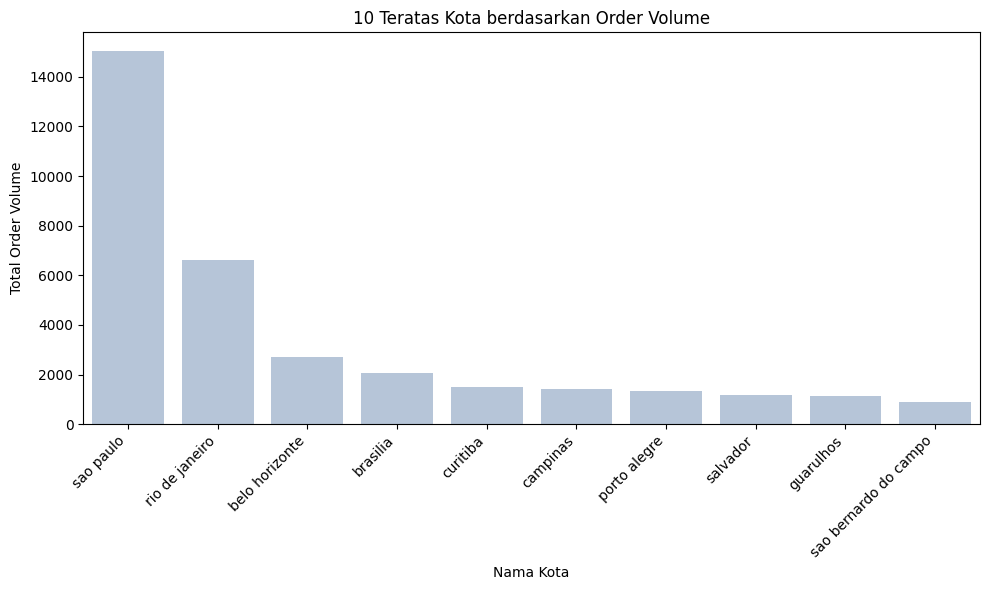

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x=city_metrics['order_volume'].head(10).index, y=city_metrics['order_volume'].head(10).values, color='lightsteelblue', legend=False)
plt.title('10 Teratas Kota berdasarkan Order Volume', fontsize=12)
plt.xlabel('Nama Kota', fontsize=10)
plt.ylabel('Total Order Volume', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Selanjutnya, dari dataframe geo_data_df akan dihitung pelanggan masing-masing negara bagian yaitu pada kolom `order_volume`.


In [66]:
state_metrics = geo_data_df.groupby('customer_state').agg(
    order_volume=('order_id', 'nunique'),
    total_sales=('price', lambda x: (x + geo_data_df.loc[x.index, 'freight_value']).sum())
).sort_values(by='order_volume', ascending=False)

display(state_metrics.head())

,order_volume,total_sales
customer_state,,
SP,40489,5767792.05
RJ,12351,2055589.53
MG,11352,1818644.05
RS,5342,860724.74
PR,4923,781708.80


- Selanjutnya akan divisualisasikan 10 negara bagian teratas berdasarkan volume penjualan menggunakan `sns.barplot`.



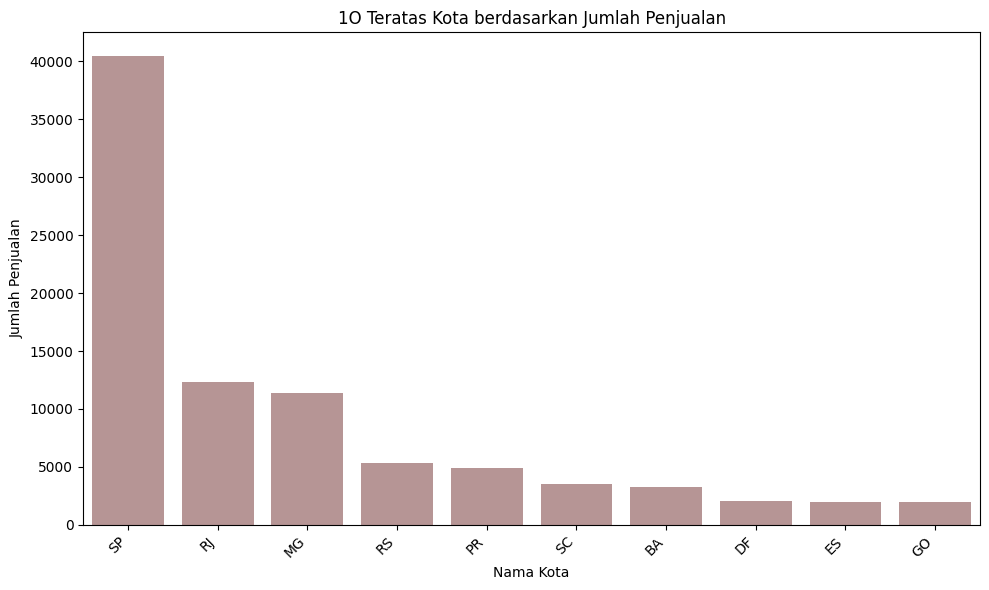

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x=state_metrics['order_volume'].head(10).index, y=state_metrics['order_volume'].head(10).values, color='rosybrown', legend=False)
plt.title('1O Teratas Kota berdasarkan Jumlah Penjualan', fontsize=12)
plt.xlabel('Nama Kota', fontsize=10)
plt.ylabel('Jumlah Penjualan', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**

Volume penjualan tertinggi berada di negara bagian SP (sao Paulo) yaitu sebanyak 40489 penjualan, sedangkan untuk kota yang memiliki volume penjualan tertinggi adalah kota sao paulo yaitu sebanyak 15044 penjualan.

### Pertanyaan 3: Berapa waktu rata-rata rentang waktu yang diperlukan antara waktu pemesanan dan penerimaan barang?

Menggunakan dataframe `orders_df` akan dilihat dan dihitung rata-rata rentang waktu yang diperlukan antara waktu pemesanan dan penerimaan barang yaitu pada kolom delivery_time.

In [68]:
orders_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,96461,96461,96461,96461,96461,96461.000000
mean,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,12.517007
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000
25%,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,7.000000
50%,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,10.000000
75%,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,16.000000
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,210.000000
std,NaN,NaN,NaN,NaN,NaN,9.550354


/tmp/ipython-input-569019957.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(orders_df['delivery_time'], bins=30, kde=True, palette='viridis')


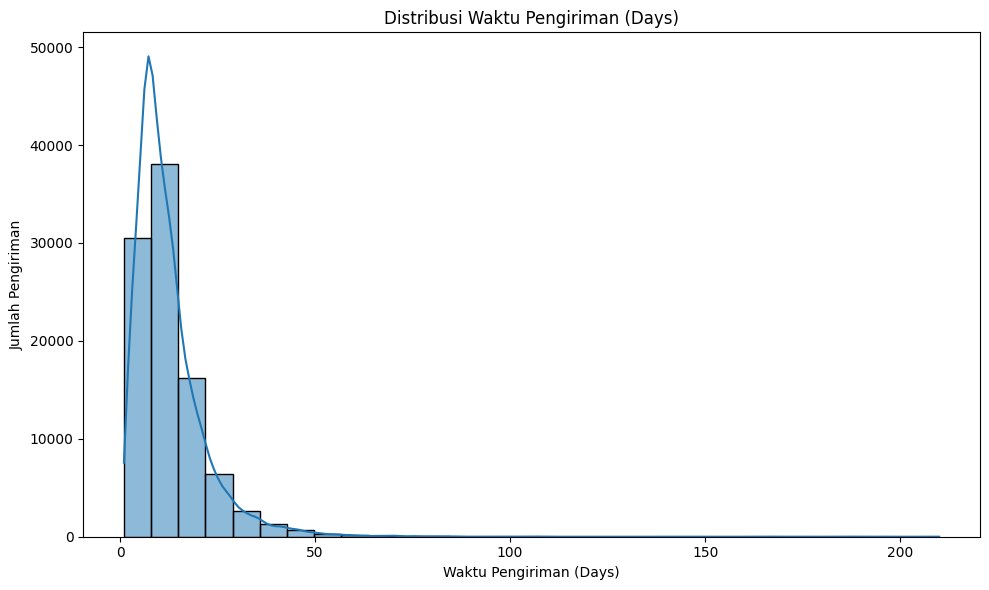

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(orders_df['delivery_time'], bins=30, kde=True, palette='viridis')
plt.title('Distribusi Waktu Pengiriman (Days)', fontsize=12)
plt.xlabel('Waktu Pengiriman (Days)', fontsize=10)
plt.ylabel('Jumlah Pengiriman', fontsize=10)
plt.tight_layout()
plt.show()

**Insight:**

Dari nilai parameter statistik pada kolom delivery_time dan dari plot yang digambarkan, diperoleh:
- Waktu pengiriman tercepat adalah 1 hari.
- Waktu pengiriman terlama adalah 210 hari.
- Waktu rata-rata yang dibutuhkan antara pemesanan dan penerimaan barang adalah sekitar 12.5 hari.

### Pertanyaan 4: Berapa rentang transaksi yang dibayarkan pelanggan dan berapa rata-ratanya?

Rentang transaksi pelanggan pada masing-masing pesanan bervariasi, yang mana dapat dilihat dalam dataframe `order_items_df` pada kolom price.

In [70]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [71]:
order_items_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


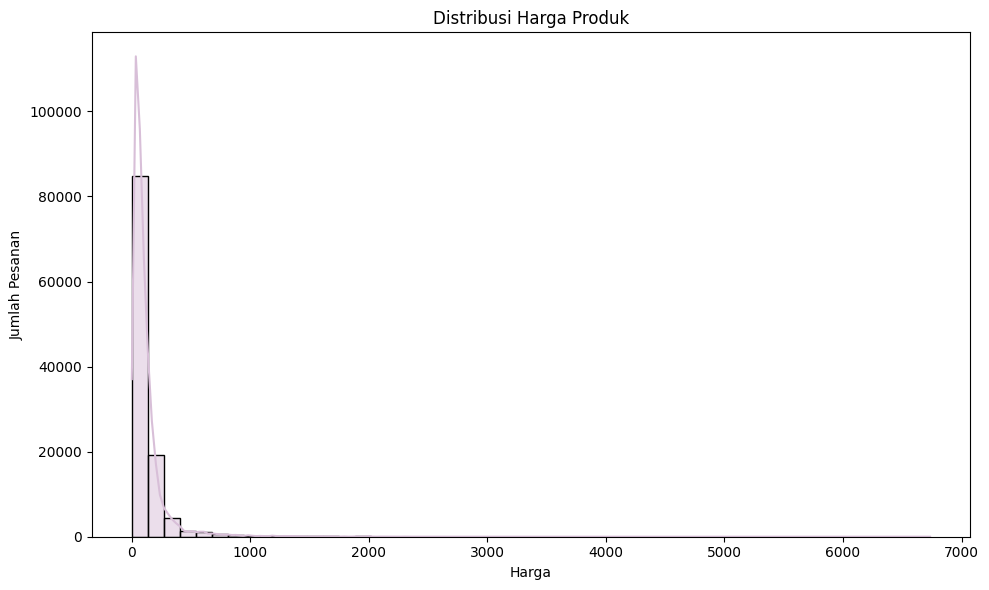

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(order_items_df['price'], bins=50, kde=True, color='thistle')
plt.title('Distribusi Harga Produk', fontsize=12)
plt.xlabel('Harga', fontsize=10)
plt.ylabel('Jumlah Pesanan', fontsize=10)
plt.tight_layout()
plt.show()

**Insight:**

Dari rangkuman parameter statistik pada kolom order_item_id dan price, serta dilihat dari plot yang sudah digambarkan, maka diperoleh informasi:
- Harga produk yang terjual memiliki rentang yang luas, dari minimal 0.85 BRL hingga maksimal 6735 BRL, dengan rata-rata transaksi pada satu kali pemesanan adalah 120.65 BRL.
- Rentang jumlah item produk pada setiap pemesanan adalah mulai dari 1 sampai 21 item.

## Analisis Lanjutan : Geospatial Analysis

### Mempersiapkan dan membersihkan data
Untuk melanjutkan analisis, muat file `geolocation_dataset.csv` untuk memperoleh koordinat geografis. Namai dataframe dengan nama geolocation_df

In [73]:
geolocation_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/geolocation_dataset.csv')
display(geolocation_df.head())

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Selanjutnya mengelompokkan 'geolocation_df' berdasarkan 'geolocation_zip_code_prefix' dan menghitung rata-rata lintang dan bujur sebagai persiapan untuk menggabungkan data geografis.

In [74]:
avg_geolocation_df = geolocation_df.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
}).reset_index()
display(avg_geolocation_df.head())

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733


Dataframe 'avg_geolocation_df' sudah disiapkan, kemudian akan menggabungkan 'orders_df' dan 'customers_df' berdasarkan 'customer_id'.

In [75]:
customer_order_df = pd.merge(orders_df, customers_df, on='customer_id', how='left')
display(customer_order_df.head())


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


Selanjutnya, menggabungkan 'customer_order_df' dengan 'order_items_df' pada kolom 'order_id' untuk membuat 'full_orders_df'.

In [76]:
full_orders_df = pd.merge(customer_order_df, order_items_df, on='order_id', how='left')
display(full_orders_df.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


Selanjutnya, menggabungkan `full_orders_df` dengan `avg_geolocation_df` menggunakan `customer_zip_code_prefix` dan `geolocation_zip_code_prefix` dan menyimpan hasilnya di `master_df`.

In [77]:
master_df = pd.merge(full_orders_df, avg_geolocation_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
display(master_df.head())
master_df.info()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3149.0,-23.576983,-46.587161
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,...,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,47813.0,-12.177924,-44.660711
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,75265.0,-16.745150,-48.514783
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,...,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59296.0,-5.774190,-35.271143
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,...,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,9195.0,-23.676370,-46.514627


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110180 entries, 0 to 110179
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110180 non-null  object        
 1   customer_id                    110180 non-null  object        
 2   order_status                   110180 non-null  object        
 3   order_purchase_timestamp       110180 non-null  datetime64[ns]
 4   order_approved_at              110180 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110180 non-null  datetime64[ns]
 6   order_delivered_customer_date  110180 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110180 non-null  datetime64[ns]
 8   delivery_time                  110180 non-null  float64       
 9   customer_unique_id             110180 non-null  object        
 10  customer_zip_code_prefix       110180 non-null  int64         
 11  

Dari kolom di atas dilihat ada beberapa missing value pada kolom geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, kemudian membersihkan dan menyiapkan Geospatial Data.

Menghapus missing value

In [78]:
print(f"Jumlah baris sebelum menghapus missing value: {len(master_df)}")
master_df.dropna(subset=['geolocation_lat', 'geolocation_lng'], inplace=True)
print(f"Jumlah baris setelah menghapus missing value: {len(master_df)}")
master_df.info()

Jumlah baris sebelum menghapus missing value: 110180
Jumlah baris setelah menghapus missing value: 109892
<class 'pandas.core.frame.DataFrame'>
Index: 109892 entries, 0 to 110179
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       109892 non-null  object        
 1   customer_id                    109892 non-null  object        
 2   order_status                   109892 non-null  object        
 3   order_purchase_timestamp       109892 non-null  datetime64[ns]
 4   order_approved_at              109892 non-null  datetime64[ns]
 5   order_delivered_carrier_date   109892 non-null  datetime64[ns]
 6   order_delivered_customer_date  109892 non-null  datetime64[ns]
 7   order_estimated_delivery_date  109892 non-null  datetime64[ns]
 8   delivery_time                  109892 non-null  float64       
 9   customer_unique_id             1098

langkah berikutnya adalah mengelompokkan data berdasarkan metrik geografis dan penjualan yang relevan untuk mempersiapkan visualisasi

In [79]:
geospatial_sales_df = master_df.groupby(['customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng']).agg(
    total_orders=('order_id', 'nunique'),
    total_sales=('price', 'sum')
).reset_index()
display(geospatial_sales_df.head())
geospatial_sales_df.info()

,customer_city,customer_state,geolocation_lat,geolocation_lng,total_orders,total_sales
0,abadia dos dourados,MG,-18.474476,-47.407837,3,358.90
1,abadiania,GO,-16.193742,-48.709521,1,949.99
2,abaete,MG,-19.158206,-45.446300,11,1597.81
3,abaetetuba,PA,-1.723024,-48.881065,11,4028.57
4,abaiara,CE,-7.358247,-39.045817,2,262.90


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14777 entries, 0 to 14776
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_city    14777 non-null  object 
 1   customer_state   14777 non-null  object 
 2   geolocation_lat  14777 non-null  float64
 3   geolocation_lng  14777 non-null  float64
 4   total_orders     14777 non-null  int64  
 5   total_sales      14777 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 692.8+ KB


### Visualisai Geographic Distribution

Buat peta interaktif menggunakan library folium, dengan memplot kota atau provinsi beserta data penjualannya.


In [80]:
import folium
print("Folium library imported successfully.")

Folium library imported successfully.


Melakukan iterasi melalui `geospatial_sales_df` untuk menambahkan `folium.CircleMarker` dengan skala radius berdasarkan total pesanan dan menambahkan popup dengan informasi penjualan yang relevan.

In [ ]:
m = folium.Map(location=[-8.235, -51.925], zoom_start=4)

for index, row in geospatial_sales_df.iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=row['total_orders'] * 0.05, # Scale radius for better visualization
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"City: {row['customer_city']}<br>State: {row['customer_state']}<br>Total Orders: {int(row['total_orders'])}<br>Total Sales: {row['total_sales']:.2f}"
    ).add_to(m)

m

## Rangkuman :

* File `geolocation_dataset.csv` berhasil dimuat, menyediakan koordinat geografis (lintang, bujur) beserta prefiks kode pos, kota, dan negara bagian. * Data geografis diaggregasikan berdasarkan `geolocation_zip_code_prefix` untuk menghitung rata-rata lintang dan bujur, menghasilkan `avg_geolocation_df`. * Beberapa dataframe (`orders_df`, `customers_df`, `order_items_df`, `avg_geolocation_df`) berhasil digabungkan untuk membuat `master_df` yang komprehensif berisi informasi pelanggan, pesanan, dan data geografis. * Selama proses penggabungan, 288 baris (dari 110.180 entri awal) teridentifikasi tidak memiliki nilai `geolocation_lat` atau `geolocation_lng` yang sesuai dan kemudian dihapus, sehingga menghasilkan `master_df` yang bersih dengan 109.892 entri.
* Data penjualan digabungkan berdasarkan `customer_city`, `customer_state`, `geolocation_lat`, dan `geolocation_lng` ke dalam `geospatial_sales_df`. Dataframe baru ini berisi 14.777 entri penjualan geografis unik, yang merinci `total_orders` dan `total_sales` untuk setiap lokasi. * Peta interaktif `folium` berhasil dibuat, menampilkan distribusi penjualan di seluruh Brasil. Setiap kota/negara bagian dengan data penjualan direpresentasikan oleh `CircleMarker` yang radiusnya disesuaikan dengan `total_orders` (0,05 kali jumlah total pesanan) untuk menunjukkan volume penjualan secara visual. Popup menyediakan informasi rinci untuk setiap penanda, termasuk kota, negara bagian, total pesanan, dan total penjualan.

## Kesimpulan

- Pertanyaan 1 : Kategori produk yang tingkat penjualannya tertinggi berdasarkan jumlah barang terjual adalah 'bed_bath_table' (13.665 item). Sebaliknya, kategori yang tingkat penjualannya terendah yaitu 'security_and_services' (2 item).
- Pertanyaan 2 : Volume penjualan tertinggi berada di negara bagian SP (sao Paulo) yaitu sebanyak 40489 penjualan, sedangkan untuk kota yang memiliki volume penjualan tertinggi adalah kota sao paulo yaitu sebanyak 15044 penjualan.
- Pertanyaan 3 : Waktu pengiriman tercepat adalah 1 hari. Waktu pengiriman terlama adalah 210 hari. Waktu rata-rata yang dibutuhkan antara pemesanan dan penerimaan barang adalah sekitar 12.5 hari.
- Pertanyaan 4 : Harga produk yang terjual memiliki rentang yang luas, dari minimal 0.85 BRL hingga maksimal 6735 BRL, dengan rata-rata transaksi pada satu kali pemesanan adalah 120.65 BRL. Rentang jumlah item produk pada setiap pemesanan adalah mulai dari 1 sampai 21 item.

## Saran
* **Konsentrasi Geografis**: Pelanggan sangat terkonsentrasi di São Paulo (negara bagian SP dan kota 'sao paulo'). Hal ini menunjukkan bahwa São Paulo merupakan pasar utama dan pusat logistik bagi Olist, dan strategi di masa depan bisa fokus pada optimalisasi layanan atau perluasan jangkauan di wilayah ini, atau sebaliknya, menjelajahi pasar yang belum tergarap di negara bagian lain.
* **Analisis Kinerja Produk**: Mengingat banyaknya produk unik (32.951) dan distribusi kategori produk yang beragam, langkah berikutnya bisa melibatkan analisis kategori produk atau produk individual mana yang menghasilkan pendapatan terbanyak atau memiliki kepuasan pelanggan tertinggi. Hal ini dapat menjadi acuan dalam manajemen inventaris, kampanye pemasaran, atau strategi pengembangan produk.

# MEMBUAT DASHBOARD

Buat dashboard Streamlit yang memvisualisasikan data penjualan dari DataFrame yang disediakan. Dashboard harus mencakup:
- Grafik batang yang menunjukkan 10 kategori produk teratas dan terbawah berdasarkan volume penjualan (`product_sales_by_category`).
- Grafik batang yang menunjukkan 10 kota dan negara bagian teratas berdasarkan volume pesanan (`city_metrics`, `state_metrics`).
- Histogram waktu pengiriman (`orders_df`).
- Histogram harga produk (`order_items_df`).
- Peta interaktif Folium yang menampilkan data penjualan geospasial (`geospatial_sales_df`).

Dashboard harus dibuat dalam file Python baru (misalnya, `dashboard_app.py`) dan menyertakan impor yang diperlukan (`streamlit`, `pandas`, `matplotlib.pyplot`, `seaborn`, `folium`). Terakhir, berikan petunjuk tentang cara menjalankan aplikasi Streamlit.

## Persiapan Data untuk Dashboard

### Subtask:
Mengambil atau mengagregasi data-data yang akan ditampilkan di dashboard Streamlit dari DataFrame yang sudah ada, seperti product_sales_by_category, city_metrics, state_metrics, orders_df (untuk delivery_time), order_items_df (untuk price), dan geospatial_sales_df.


Pertama, membuat direktori baru bernama 'data' di Google Drive untuk menyimpan file CSV untuk dashboard Streamlit. Kemudian menyimpan `product_sales_by_category` ke file CSV di direktori 'data', termasuk indeksnya sesuai permintaan.

In [ ]:
import os

data_dir = '/content/drive/MyDrive/Colab_Notebooks/data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir, exist_ok=True)
    print(f"Directory '{data_dir}' dibuat dalam Google Drive.")
else:
    print(f"Directory '{data_dir}' sudah ada.")

product_sales_by_category.to_csv(os.path.join(data_dir, 'product_sales_by_category.csv'), index=True)
print(f"product_sales_by_category.csv tersimpan ke dalam {data_dir}")

Directory '/content/drive/MyDrive/Colab_Notebooks/data' dibuat dalam Google Drive.
product_sales_by_category.csv tersimpan ke dalam /content/drive/MyDrive/Colab_Notebooks/data


Menyimpan DataFrame `city_metrics` ke file CSV di direktori 'data'.

In [ ]:
city_metrics.to_csv(os.path.join(data_dir, 'city_metrics.csv'), index=True)
print("Saved city_metrics.csv")

Saved city_metrics.csv


**Reasoning**:
menyimpan DataFrame `state_metrics` ke file CSV di direktori 'data'.

In [ ]:
state_metrics.to_csv(os.path.join(data_dir, 'state_metrics.csv'), index=True)
print("Saved state_metrics.csv")

Saved state_metrics.csv


**Reasoning**:
Menyimpan `orders_df` DataFrame ke file CSV bernama `orders_data.csv` di direktori 'data'.



In [ ]:
orders_df.to_csv(os.path.join(data_dir, 'orders_data.csv'), index=False)
print("Saved orders_data.csv")

Saved orders_data.csv


Menyimpan DataFrame `order_items_df` ke file CSV bernama `order_items_data.csv` di direktori 'data', memastikan bahwa kolom `price` tersimpan dengan benar.

In [ ]:
order_items_df.to_csv(os.path.join(data_dir, 'order_items_data.csv'), index=False)
print("Saved order_items_data.csv")

Saved order_items_data.csv


Menyimpan DataFrame `geospatial_sales_df` ke file CSV bernama `geospatial_sales_data.csv` di direktori 'data', memastikan bahwa kolom price tersimpan dengan benar.


In [ ]:
geospatial_sales_df.to_csv(os.path.join(data_dir, 'geospatial_sales_data.csv'), index=False)
print("Saved geospatial_sales_data.csv")

Saved geospatial_sales_data.csv


## Pengaturan Dasar Dashboard Streamlit

### Subtask:
Membuat file Python baru (`dashboard_app.py`) dan menyiapkan struktur dasar Streamlit, termasuk mengimpor library yang diperlukan (`streamlit`, `pandas`, `matplotlib.pyplot`, `seaborn`, `folium`), mengatur judul halaman, dan tata letak awal (misalnya, menggunakan `st.sidebar` atau `st.columns`).


- Membuat file Python baru

In [ ]:
%%writefile /content/drive/MyDrive/Colab_Notebooks/data/dashboard_app.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from streamlit_folium import folium_static
import os

# Menentukan direktori data
data_dir = '/content/drive/MyDrive/Colab_Notebooks/data'

# Memuat DataFrame
try:
    product_sales_by_category = pd.read_csv(f'{data_dir}/product_sales_by_category.csv', index_col='product_category_name_english')
    city_metrics = pd.read_csv(f'{data_dir}/city_metrics.csv', index_col='customer_city')
    state_metrics = pd.read_csv(f'{data_dir}/state_metrics.csv', index_col='customer_state')
    orders_df = pd.read_csv(f'{data_dir}/orders_data.csv', parse_dates=[
        'order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date'
    ])
    order_items_df = pd.read_csv(f'{data_dir}/order_items_data.csv', parse_dates=['shipping_limit_date'])
    geospatial_sales_df = pd.read_csv(f'{data_dir}/geospatial_sales_data.csv')
except FileNotFoundError:
    st.error("Error: Data files not found. Please ensure 'data' directory and CSVs are correctly placed.")
    st.stop()

# Set Streamlit page configuration
st.set_page_config(page_title="E-Commerce Sales Dashboard", layout="wide")
st.title("OLIST STORE DASHBOARD 🌻")


Writing /content/drive/MyDrive/Colab_Notebooks/data/dashboard_app.py


## Menampilkan Kategori Produk Tingkat Penjualan Tertinggi dan Terendah

Tambahkan kode untuk menampilkan 10 kategori produk teratas dan 10 kategori produk terbawah berdasarkan volume penjualan ke file `dashboard_app.py`. Ini melibatkan pembuatan dua diagram batang menggunakan `matplotlib` dan `seaborn` dan kemudian menampilkannya di Streamlit menggunakan `st.pyplot()`.

In [ ]:
%%writefile -a /content/drive/MyDrive/Colab_Notebooks/data/dashboard_app.py

# --- 1. Kategori Produk Tingkat Penjualan Tertinggi dan Terendah ---
st.subheader("Kategori Produk Tingkat Penjualan Tertinggi dan Terendah")

# Plotting Top 10 Product Categories
st.markdown("#### Kategori Produk Tingkat Penjualan Tertinggi")
fig_top_products, ax_top_products = plt.subplots(figsize=(10, 6))
top_products_df = product_sales_by_category.head(10).reset_index()
top_products_df.columns = ['Kategori Produk', 'Jumlah Item Terjual']
sns.barplot(x='Kategori Produk', y='Jumlah Item Terjual', data=top_products_df, color='palegreen', ax=ax_top_products)
ax_top_products.set_title('Penjualan Tertinggi berdasarkan Kategori Produk', fontsize=12)
ax_top_products.set_xlabel('Kategori Produk', fontsize=10)
ax_top_products.set_ylabel('Jumlah Item Terjual', fontsize=10)
ax_top_products.tick_params(axis='x', rotation=45)
plt.tight_layout()
st.pyplot(fig_top_products)

# Plotting Bottom 10 Product Categories
st.markdown("#### Kategori Produk Tingkat PenjualanTerendah")
fig_bottom_products, ax_bottom_products = plt.subplots(figsize=(10, 6))
bottom_products_df = product_sales_by_category.tail(10).reset_index()
bottom_products_df.columns = ['Kategori Produk', 'Jumlah Item Terjual']
sns.barplot(x='Kategori Produk', y='Jumlah Item Terjual', data=bottom_products_df, color='lightcoral', ax=ax_bottom_products)
ax_bottom_products.set_title('Penjualan Terendah berdasarkan Kategori Produk', fontsize=12)
ax_bottom_products.set_xlabel('Kategori Produk', fontsize=10)
ax_bottom_products.set_ylabel('Jumlah Item Terjual', fontsize=10)
ax_bottom_products.tick_params(axis='x', rotation=45)
plt.tight_layout()
st.pyplot(fig_bottom_products)

Appending to /content/drive/MyDrive/Colab_Notebooks/data/dashboard_app.py


## Menampilkan Volume Pesanan per Kota dan Negara Bagian

Tambahkan kode untuk menampilkan 10 kota dan provinsi teratas berdasarkan volume pesanan ke dalam file `dashboard_app.py`. Ini melibatkan pembuatan dua grafik batang menggunakan `matplotlib` dan `seaborn` kemudian menampilkannya di Streamlit menggunakan `st.pyplot()` sesuai dengan petunjuk.

In [ ]:
%%writefile -a /content/drive/MyDrive/Colab_Notebooks/data/dashboard_app.py

# --- 2. Volume Pesanan per Kota dan Negara Bagian ---
st.subheader("Volume Pesanan per Kota dan Negara Bagian")

# Plotting Top 10 Cities by Order Volume
st.markdown("#### Kota Teratas berdasarkan Volume Pesanan")
fig_top_cities, ax_top_cities = plt.subplots(figsize=(10, 6))
top_cities_df = city_metrics['order_volume'].head(10).reset_index()
top_cities_df.columns = ['Nama Kota', 'Total Volume Pesanan']
sns.barplot(x='Nama Kota', y='Total Volume Pesanan', data=top_cities_df, color='lightsteelblue', ax=ax_top_cities)
ax_top_cities.set_title('Kota Teratas berdasarkan Volume Pesanan', fontsize=12)
ax_top_cities.set_xlabel('Nama Kota', fontsize=10)
ax_top_cities.set_ylabel('Total Volume Pesanan', fontsize=10)
ax_top_cities.tick_params(axis='x', rotation=45)
plt.tight_layout()
st.pyplot(fig_top_cities)

# Plotting Top 10 States by Order Volume
st.markdown("#### Negara Bagian Teratas berdasarkan Volume Pesanan")
fig_top_states, ax_top_states = plt.subplots(figsize=(10, 6))
top_states_df = state_metrics['order_volume'].head(10).reset_index()
top_states_df.columns = ['Nama Negara Bagian', 'Total Volume Pesanan']
sns.barplot(x='Nama Negara Bagian', y='Total Volume Pesanan', data=top_states_df, color='rosybrown', ax=ax_top_states)
ax_top_states.set_title('Negara Bagian Teratas berdasarkan Volume Pesanan', fontsize=12)
ax_top_states.set_xlabel('Nama Negara Bagian', fontsize=10)
ax_top_states.set_ylabel('Total Volume Pesanan', fontsize=10)
ax_top_states.tick_params(axis='x', rotation=45)
plt.tight_layout()
st.pyplot(fig_top_states)

Appending to /content/drive/MyDrive/Colab_Notebooks/data/dashboard_app.py


Tambahkan kode untuk menampilkan histogram waktu pengiriman dan harga produk ke file `dashboard_app.py`, seperti yang ditentukan dalam tugas utama. Ini melibatkan pembuatan dua histogram menggunakan `matplotlib` dan `seaborn` dan kemudian menampilkannya di Streamlit menggunakan `st.pyplot()`.

In [ ]:
%%writefile -a /content/drive/MyDrive/Colab_Notebooks/data/dashboard_app.py

# --- 3. Distribusi Waktu Pengiriman dan Harga Produk ---
st.subheader("Distribusi Waktu Pengiriman dan Harga Produk")

# Plotting Delivery Time Histogram
st.markdown("#### Distribusi Waktu Pengiriman")
fig_delivery_time, ax_delivery_time = plt.subplots(figsize=(10, 6))
sns.histplot(orders_df['delivery_time'], bins=30, kde=True, palette='viridis', ax=ax_delivery_time)
ax_delivery_time.set_title('Distribusi Waktu Pengiriman', fontsize=12)
ax_delivery_time.set_xlabel('Waktu Pengiriman (Hari)', fontsize=10)
ax_delivery_time.set_ylabel('Jumlah Pengiriman', fontsize=10)
plt.tight_layout()
st.pyplot(fig_delivery_time)

# Plotting Product Price Histogram
st.markdown("#### Distribusi Harga Produk")
fig_price_dist, ax_price_dist = plt.subplots(figsize=(10, 6))
sns.histplot(order_items_df['price'], bins=50, kde=True, color='thistle', ax=ax_price_dist)
ax_price_dist.set_title('Distribusi Harga Produk', fontsize=12)
ax_price_dist.set_xlabel('Harga', fontsize=10)
ax_price_dist.set_ylabel('Jumlah Pesanan', fontsize=10)
plt.tight_layout()
st.pyplot(fig_price_dist)

Appending to /content/drive/MyDrive/Colab_Notebooks/data/dashboard_app.py


Tambahkan kode untuk menampilkan peta interaktif Folium ke file `dashboard_app.py`, seperti yang ditentukan dalam tugas utama. Ini melibatkan pembuatan peta Folium dan kemudian merendernya di Streamlit menggunakan `folium_static`.

In [ ]:
%%writefile -a /content/drive/MyDrive/Colab_Notebooks/data/dashboard_app.py

# --- 4. Distribusi Geografis Penjualan ---
st.subheader("Distribusi Geografis Penjualan")
st.markdown("#### Peta Interaktif Distribusi Penjualan")

m = folium.Map(location=[-14.235, -51.925], zoom_start=4)

for index, row in geospatial_sales_df.iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=row['total_orders'] * 0.05,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"City: {row['customer_city']}<br>State: {row['customer_state']}<br>Total Orders: {int(row['total_orders'])}<br>Total Sales: {row['total_sales']:.2f}"
    ).add_to(m)

folium_static(m)


Appending to /content/drive/MyDrive/Colab_Notebooks/data/dashboard_app.py


## Cara Menjalankan Aplikasi Streamlit

Untuk menjalankan dashboard Streamlit, ikuti langkah-langkah berikut:

1. Pastikan Anda berada di direktori yang sama dengan `dashboard_app.py` dan folder `data` yang berisi file CSV.
2. Buka terminal atau command prompt.
3. Jalankan perintah berikut:
   ```bash
   streamlit run dashboard_app.py
   ```
4. Streamlit akan membuka tab baru di browser web Anda secara otomatis yang menampilkan dashboard.

Untuk menjalankan aplikasi Streamlit, masukkan perintah berikut di sel kode baru dan jalankan:


In [ ]:
!pip install streamlit_folium
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64

!streamlit run /content/drive/MyDrive/Colab_Notebooks/data/dashboard_app.py --server.port 8501 &>/content/streamlit.log &

!./cloudflared-linux-amd64 tunnel --url http://localhost:8501